<a href="https://colab.research.google.com/github/amaluvincent/Fake-News-Detection/blob/main/Fake_news_detection_NLP_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Setting up the environment

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
!pip install tensorflow keras


# 2.Importing libraraies

In [3]:
# import necessary libabaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# 3.Load dataset

In [4]:
# Load the ISOT dataset
true_news = pd.read_csv('/content/True.csv')
fake_news =  pd.read_csv('/content/Fake.csv')

# checking the size of each files
print('true:',true_news.shape)
print('fake:', fake_news.shape)


true: (21417, 4)
fake: (23481, 4)


In [5]:
# Display information about the true news dataset
print("True News Dataset Info:")
true_news.info()

# Display information about the fake news dataset
print("\nFake News Dataset Info:")
fake_news.info()


True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


# 4. Data cleaning and preparation

In [6]:
# Check for null values in each column of true_news and fake_news
print("Null values in True News dataset:")
print(true_news.isnull().sum())

print("\nNull values in Fake News dataset:")
print(fake_news.isnull().sum())


Null values in True News dataset:
title      0
text       0
subject    0
date       0
dtype: int64

Null values in Fake News dataset:
title      0
text       0
subject    0
date       0
dtype: int64


In [7]:
# Add a label to each dataframe
true_news['label'] = 0   # 0 for legitimate news
fake_news['label'] = 1   # 1 for fake news

# Combine both datasets
df = pd.concat([true_news, fake_news],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # shuffle the data

# Print the combined dataset (first few rows)
print(df.head(5))
print(df.shape)



                                               title  \
0  U.S. Congress passes funding bill; averts gove...   
1  Trump weighs revised travel ban, Supreme Court...   
2   BREAKING: GOP Civil War Kicks Off With A Blas...   
3   Trump Official Accidentally Leaks Plan To Ste...   
4  Louisiana governor says state's finances in di...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The U.S. Congress on We...  politicsNews   
1  PALM BEACH, Fla./WASHINGTON (Reuters) - U.S. P...  politicsNews   
2  Republican presidential nominee Donald Trump i...          News   
3  Mexican President Enrique Pe a Nieto may not b...          News   
4  (Reuters) - Louisiana Governor John Bel Edward...  politicsNews   

                  date  label  
0  September 29, 2016       0  
1    February 9, 2017       0  
2     October 11, 2016      1  
3       March 29, 2017      1  
4   February 12, 2016       0  
(44898, 5)


In [8]:
# Check for missing values after combined
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [9]:
# print dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [10]:
# Removing unnecessary column(date)
df = df.drop(columns=["date"])
print(df.head())

                                               title  \
0  U.S. Congress passes funding bill; averts gove...   
1  Trump weighs revised travel ban, Supreme Court...   
2   BREAKING: GOP Civil War Kicks Off With A Blas...   
3   Trump Official Accidentally Leaks Plan To Ste...   
4  Louisiana governor says state's finances in di...   

                                                text       subject  label  
0  WASHINGTON (Reuters) - The U.S. Congress on We...  politicsNews      0  
1  PALM BEACH, Fla./WASHINGTON (Reuters) - U.S. P...  politicsNews      0  
2  Republican presidential nominee Donald Trump i...          News      1  
3  Mexican President Enrique Pe a Nieto may not b...          News      1  
4  (Reuters) - Louisiana Governor John Bel Edward...  politicsNews      0  


In [11]:
# Removing unnecessary column(title)
df = df.drop(columns=["title"])
print(df.head())

                                                text       subject  label
0  WASHINGTON (Reuters) - The U.S. Congress on We...  politicsNews      0
1  PALM BEACH, Fla./WASHINGTON (Reuters) - U.S. P...  politicsNews      0
2  Republican presidential nominee Donald Trump i...          News      1
3  Mexican President Enrique Pe a Nieto may not b...          News      1
4  (Reuters) - Louisiana Governor John Bel Edward...  politicsNews      0


In [12]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to calculate changes per preprocessing step
def analyze_preprocessing(text):
    if pd.isnull(text) or text.strip() == "":  # Handle NaN or empty string input
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
            'Cleaned Text': ''
        }
    # Initial count of tokens
    original_tokens = word_tokenize(text)   # Tokenization
    total_tokens = len(original_tokens)

     # Check if there are no tokens, return 0 for all changes
    if total_tokens == 0:
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
        }

    # Step-by-step preprocessing
    lowercased_text = text.lower()    # Lowercasing
    lowercased_tokens = word_tokenize(lowercased_text)    #Tokenization
    alphabetic_tokens = [word for word in lowercased_tokens if word.isalpha()]  #Remove non-alphabetic tokens
    non_stopword_tokens = [word for word in alphabetic_tokens if word not in stop_words]  # Stopword removal
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in non_stopword_tokens]    # Lemmatization

    # Calculate changes as percentages
    #total_tokens = len(original_tokens)
    lowercasing_change = 100 if any(word.isupper() for word in original_tokens) else 0
    non_alpha_removed = (len(lowercased_tokens) - len(alphabetic_tokens)) / total_tokens * 100 if total_tokens > 0 else 0
    stopword_removed = (len(alphabetic_tokens) - len(non_stopword_tokens)) / total_tokens * 100 if total_tokens > 0 else 0
    lemmatization_changes = sum(1 for orig, lemma in zip(non_stopword_tokens, lemmatized_tokens) if orig != lemma) / total_tokens * 100 if non_stopword_tokens else 0

     # Join the lemmatized tokens to form the cleaned text
    cleaned_text = ' '.join(lemmatized_tokens)

    return {
        'Lowercasing Change (%)': lowercasing_change,
        'Non-Alpha Removed (%)': non_alpha_removed,
        'Stopwords Removed (%)': stopword_removed,
        'Lemmatization Changes (%)': lemmatization_changes,
        'Cleaned Text': cleaned_text
    }

# Apply the analysis function to each text in the dataframe and create a new dataframe to store results
df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)', 'Stopwords Removed (%)',
    'Lemmatization Changes (%)','cleaned_text']] = df['text'].apply(lambda x: pd.Series(analyze_preprocessing(x)))

# Display average percentages across all text entries
average_changes = df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)',
                      'Stopwords Removed (%)', 'Lemmatization Changes (%)']].mean()
print("Average Changes across all texts:\n", average_changes)


Average Changes across all texts:
 Lowercasing Change (%)       94.683505
Non-Alpha Removed (%)        13.359675
Stopwords Removed (%)        36.966757
Lemmatization Changes (%)     5.621935
dtype: float64


In [13]:
# Print the original and cleaned text
print(df[['text','cleaned_text','Lowercasing Change (%)', 'Non-Alpha Removed (%)',
          'Stopwords Removed (%)', 'Lemmatization Changes (%)']].head(10))  # Display the first 10 rows

                                                text  \
0  WASHINGTON (Reuters) - The U.S. Congress on We...   
1  PALM BEACH, Fla./WASHINGTON (Reuters) - U.S. P...   
2  Republican presidential nominee Donald Trump i...   
3  Mexican President Enrique Pe a Nieto may not b...   
4  (Reuters) - Louisiana Governor John Bel Edward...   
5  Actress Gabrielle Union did not hold back afte...   
6  A uniformed police officer in Virginia said he...   
7  WASHINGTON (Reuters) - U.S. House Speaker Paul...   
8  The latest in a seemingly unending torrent of ...   
9  BEIRUT (Reuters) - A hardline Sunni Muslim cle...   

                                        cleaned_text  Lowercasing Change (%)  \
0  washington reuters congress wednesday overwhel...                     100   
1  palm beach reuters president donald trump cons...                     100   
2  republican presidential nominee donald trump f...                     100   
3  mexican president enrique pe nieto may happy h...           

In [14]:
# Check for NaN values in 'cleaned_text' after preprocessing
missing_values = df['cleaned_text'].isna().sum()
print(f"Number of NaN values in 'cleaned_text': {missing_values}")


Number of NaN values in 'cleaned_text': 0


# 5.Exploratory Data Analysis

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


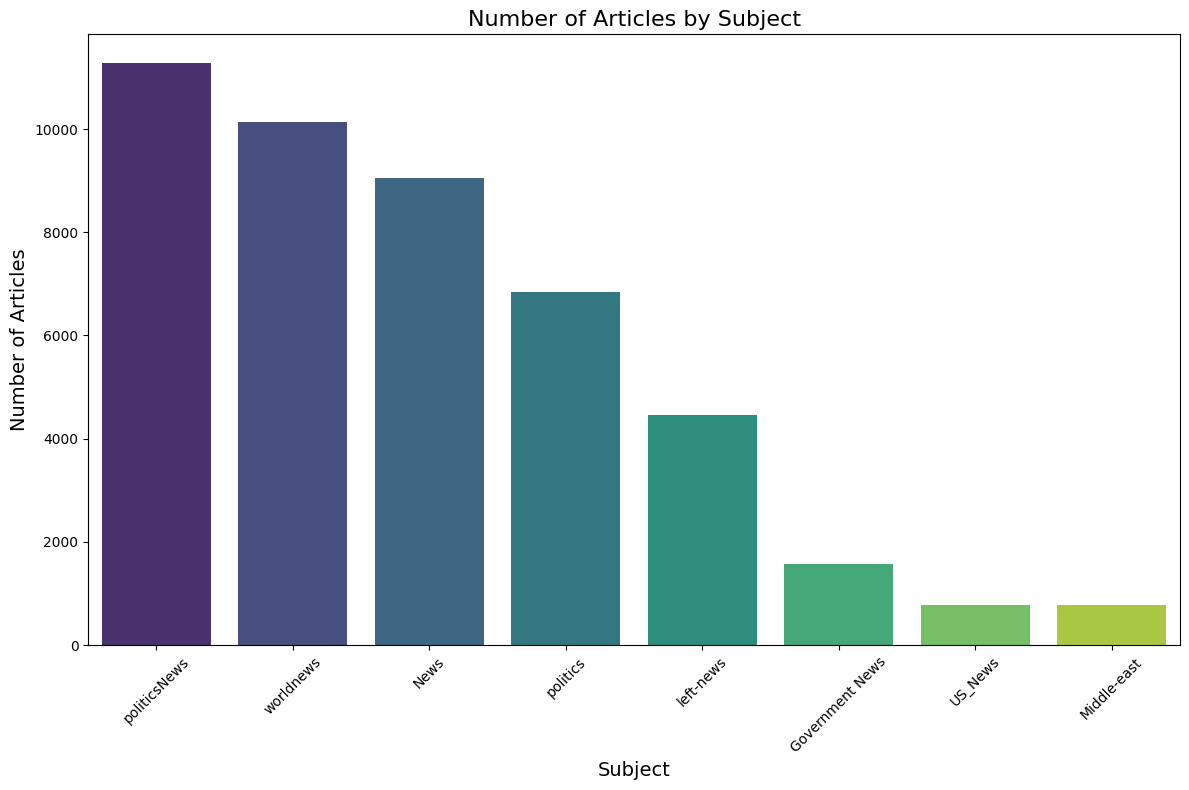

In [15]:
# Count the number of articles by subject
subject_counts = df['subject'].value_counts()
print(subject_counts)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title('Number of Articles by Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


label
1    23481
0    21417
Name: count, dtype: int64


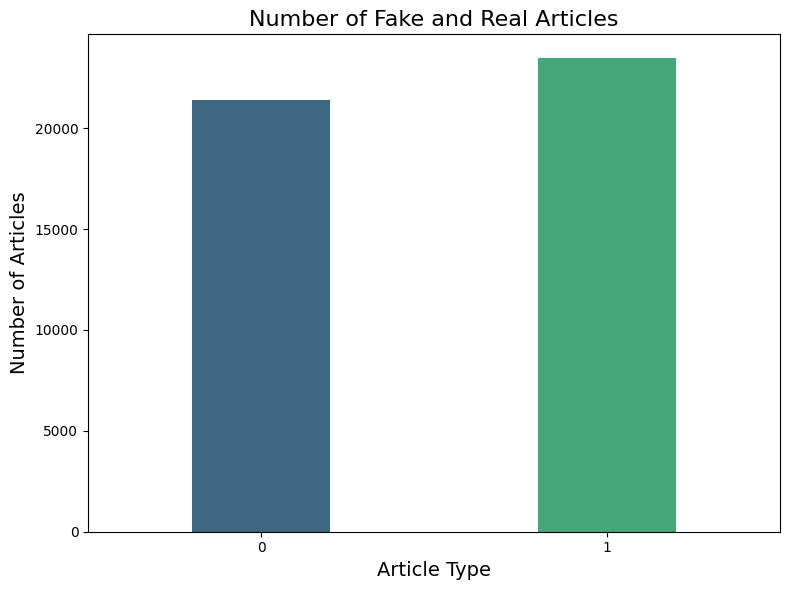

In [16]:
# How many fake and real articles?
article_counts = df['label'].value_counts()
print(article_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=article_counts.index, y=article_counts.values,palette='viridis', width=0.4)
plt.title('Number of Fake and Real Articles', fontsize=16)
plt.xlabel('Article Type', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = rus.fit_resample(df.drop(columns=['label']), df['label'])

# Create a new balanced DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
print("Class distribution after undersampling:\n", df_resampled['label'].value_counts())


Class distribution after undersampling:
 label
0    21417
1    21417
Name: count, dtype: int64


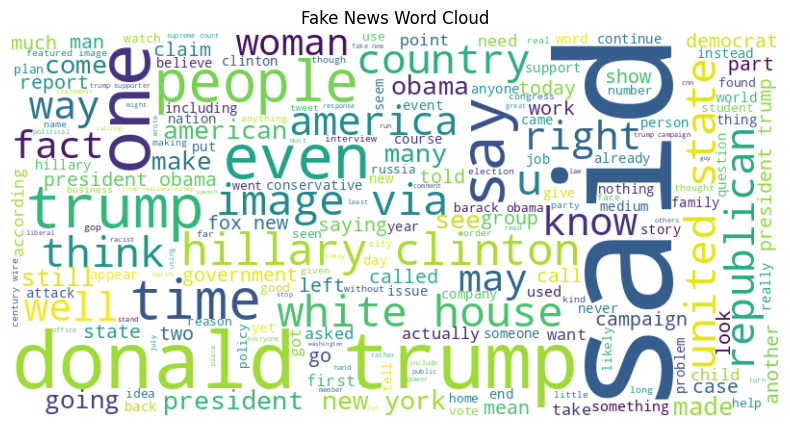

In [18]:
# Word cloud for fake news
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

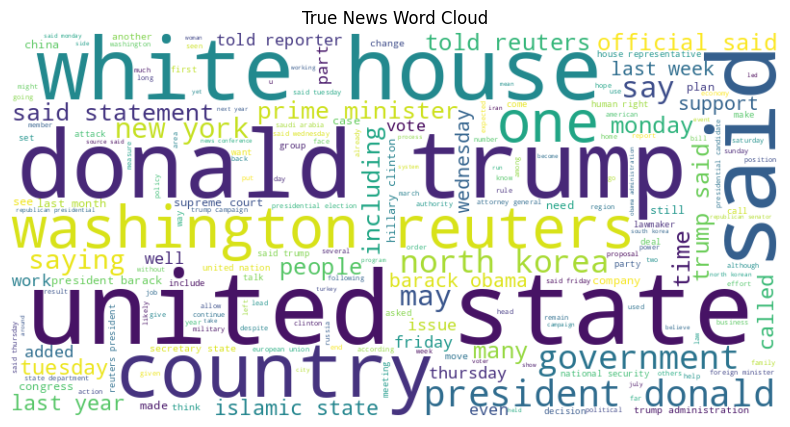

In [19]:
# Word cloud for true news

true_words = ' '.join(df[df['label'] == 0]['cleaned_text'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('True News Word Cloud')
plt.show()

Top 20 words in Fake News: [('trump', 74403), ('said', 31149), ('president', 26340), ('people', 26098), ('one', 23812), ('would', 23461), ('state', 22072), ('clinton', 18717), ('like', 18207), ('obama', 17920), ('time', 17885), ('donald', 17235), ('american', 16093), ('republican', 16061), ('say', 15528), ('also', 15243), ('year', 14843), ('news', 14198), ('new', 14198), ('u', 14172)]
Top 20 words in Real News: [('said', 99037), ('trump', 54280), ('state', 36243), ('would', 31526), ('reuters', 28412), ('president', 26939), ('republican', 22098), ('government', 19433), ('year', 18721), ('house', 16906), ('new', 16784), ('also', 15946), ('united', 15576), ('people', 15207), ('party', 14964), ('official', 14575), ('told', 14244), ('country', 13948), ('election', 13910), ('could', 13709)]


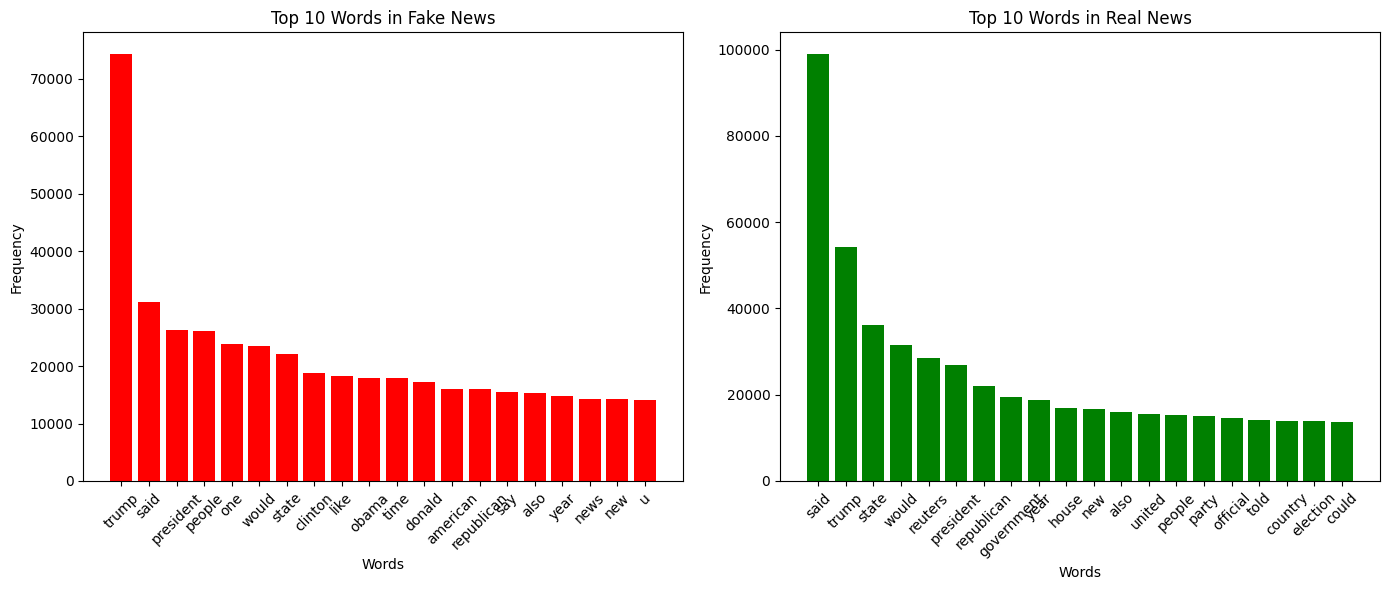

In [20]:
# Most  frequent words counter
# Fake News Word Frequency
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text']).split()
counter_fake = Counter(fake_words)
top_fake = counter_fake.most_common(20)
print("Top 20 words in Fake News:", counter_fake.most_common(20))

# Real News Word Frequency
real_words = ' '.join(df[df['label'] == 0]['cleaned_text']).split()
counter_real = Counter(real_words)
top_real = counter_real.most_common(20)
print("Top 20 words in Real News:", counter_real.most_common(20))

# Unpack the top words and their counts for fake and real news
fake_words_list, fake_counts = zip(*top_fake)
real_words_list, real_counts = zip(*top_real)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fake News Plot
axes[0].bar(fake_words_list, fake_counts, color='red')
axes[0].set_title('Top 10 Words in Fake News')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(fake_words_list, rotation=45)

# Real News Plot
axes[1].bar(real_words_list, real_counts, color='green')
axes[1].set_title('Top 10 Words in Real News')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(real_words_list, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

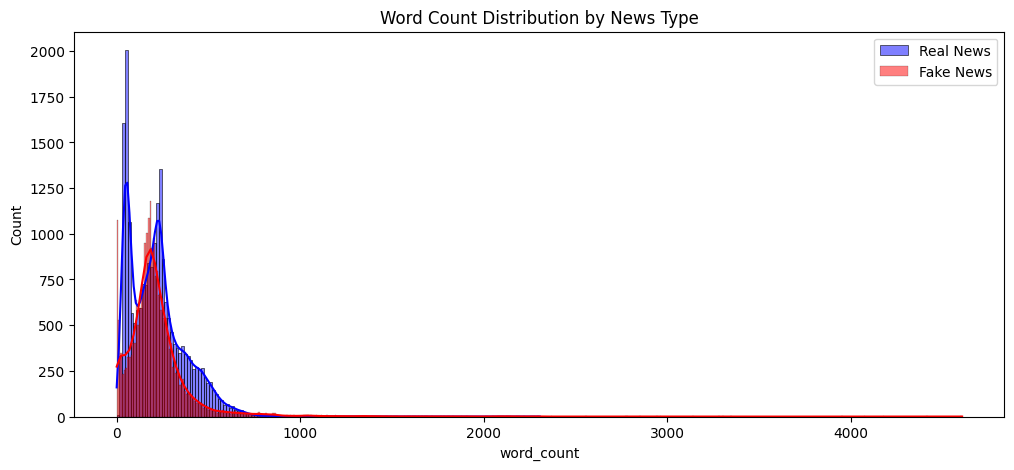

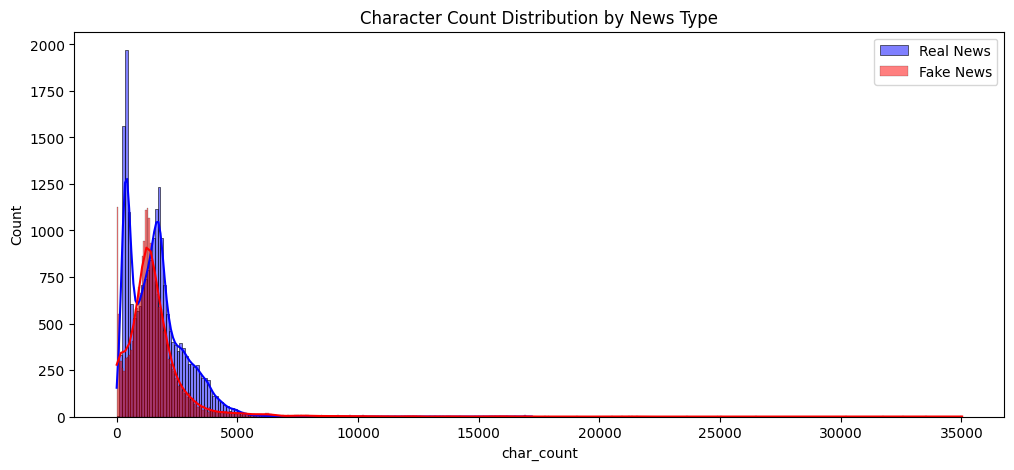

In [21]:
# Word count and sentence length analysis
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_text'].apply(len)

# Visualize word and character count distributions
plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['word_count'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['word_count'], color='red', label='Fake News', kde=True)
plt.title("Word Count Distribution by News Type")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['char_count'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['char_count'], color='red', label='Fake News', kde=True)
plt.title("Character Count Distribution by News Type")
plt.legend()
plt.show()

# 6. Feature Extraction
Convert the text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).
ngram_range=(1, 2) indicates that the TF-IDF features will contain both unigrams (single words) and bigrams (two-word combinations).
This configuration enables your model to recognise both single words and typical two-word phrases, which might be crucial for differentiating between authentic and fraudulent news.



In [22]:
# Use a smaller vocabulary in TF-IDF and reduce n-gram range
tfidf_vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1, 1))  # Reduced to unigrams and smaller vocab
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['label']


# 7.Training & Testing Data

In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (35918, 2000)
y_train shape: (35918,)
X_test shape: (8980, 2000)
y_test shape: (8980,)


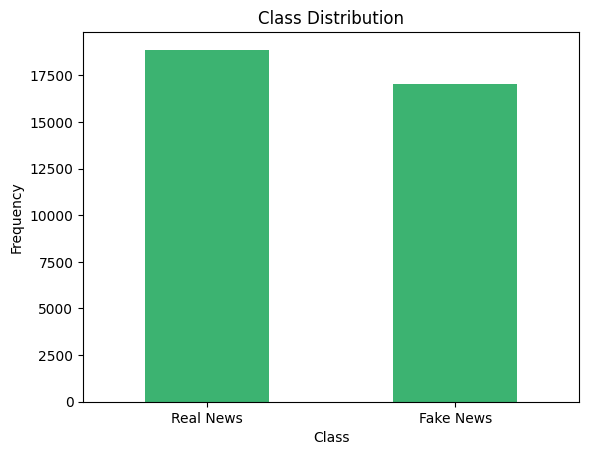

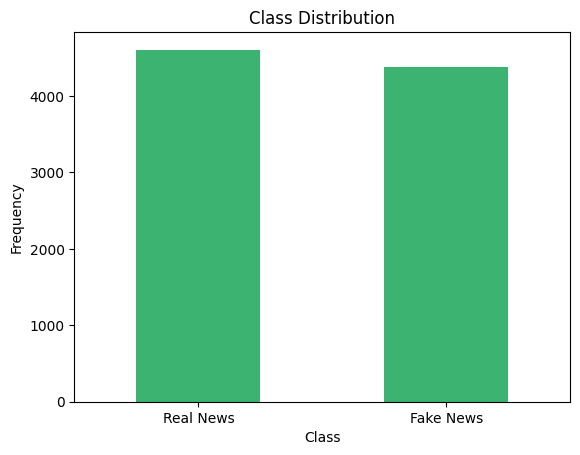

In [24]:
# Evaluate class distribution of y_train and y_test
# Plot class distribution
def plot_class_distribution(y):
    y.value_counts().plot(kind='bar', color='mediumseagreen')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(ticks=[0, 1], labels=['Real News', 'Fake News'], rotation=0)
    plt.show()

# Plot class distribution for training and test sets
plot_class_distribution(y_train)
plot_class_distribution(y_test)

# 8. Model Training & Evaluation

In [25]:
# Define models with increased regularization
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, C=0.5),  # Adding regularization (smaller C value)
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),  # Smaller depth and fewer trees
    'SVM': SVC(kernel='linear', C=0.5, probability=True, random_state=42)  # Adding regularization (smaller C value)
    }


In [26]:
# Use cross-validation for evaluation
from sklearn.model_selection import cross_val_score, StratifiedKFold
results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nEvaluating {model_name} using Cross-Validation:")

    # Cross-validation with multiple metrics
    accuracy = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy').mean()
    precision = cross_val_score(model, X_train, y_train, cv=skf, scoring='precision').mean()
    recall = cross_val_score(model, X_train, y_train, cv=skf, scoring='recall').mean()
    f1 = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1').mean()
    roc_auc = cross_val_score(model, X_train, y_train, cv=skf, scoring='roc_auc').mean()

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

    print(f"Cross-Validation Results - {model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")


Evaluating Logistic Regression using Cross-Validation:
Cross-Validation Results - Logistic Regression:
Accuracy: 0.9798, Precision: 0.9842, Recall: 0.9772, F1 Score: 0.9807, ROC-AUC: 0.9975

Evaluating Random Forest using Cross-Validation:
Cross-Validation Results - Random Forest:
Accuracy: 0.9899, Precision: 0.9935, Recall: 0.9873, F1 Score: 0.9904, ROC-AUC: 0.9990

Evaluating SVM using Cross-Validation:
Cross-Validation Results - SVM:
Accuracy: 0.9879, Precision: 0.9906, Recall: 0.9863, F1 Score: 0.9885, ROC-AUC: 0.9988


In [27]:
# Evaluate each model on the test set for comparison
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test))

    # Print and store results
    print(f"\nTest Set Results - {model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Test Set Results - Logistic Regression:
Accuracy: 0.9813, Precision: 0.9845, Recall: 0.9789, F1 Score: 0.9817, ROC-AUC: 0.9982
Confusion Matrix:
 [[4303   71]
 [  97 4509]]

Test Set Results - Random Forest:
Accuracy: 0.9915, Precision: 0.9924, Recall: 0.9911, F1 Score: 0.9917, ROC-AUC: 0.9993
Confusion Matrix:
 [[4339   35]
 [  41 4565]]

Test Set Results - SVM:
Accuracy: 0.9910, Precision: 0.9922, Recall: 0.9902, F1 Score: 0.9912, ROC-AUC: 0.9993
Confusion Matrix:
 [[4338   36]
 [  45 4561]]


# 9.Sentiment Analysis
False news often evokes extreme emotions, while legitimate news has a balanced tone. Machine learning models can improve accuracy by incorporating sentiment ratings into their models. This can reveal emotional language patterns, improve word choice, or focus on specific word types.Predominant Sentiment Calculation: The code identifies the predominant sentiment (positive, negative, or neutral) for each article by selecting the highest score among sentiment_pos, sentiment_neg, and sentiment_neu.

In [28]:
# Initialize sentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

 #  Calculate Sentiment Scores for Each Article
df['sentiment_compound'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_pos'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['pos'])
df['sentiment_neg'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['neg'])
df['sentiment_neu'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['neu'])

# Determine the predominant sentiment type for each article
df['predominant_sentiment'] = df[['sentiment_pos', 'sentiment_neg', 'sentiment_neu']].idxmax(axis=1)

# Count the occurrences of each sentiment type (positive, negative, neutral) by news type (Real vs Fake)
sentiment_counts_by_type = df.groupby(['label', 'predominant_sentiment']).size().unstack(fill_value=0)

# Print the counts of each predominant sentiment by news type
print("Count of articles by predominant sentiment and news type:")
print(sentiment_counts_by_type)

Count of articles by predominant sentiment and news type:
predominant_sentiment  sentiment_neg  sentiment_neu  sentiment_pos
label                                                             
0                                  2          21412              3
1                                 78          22631            772


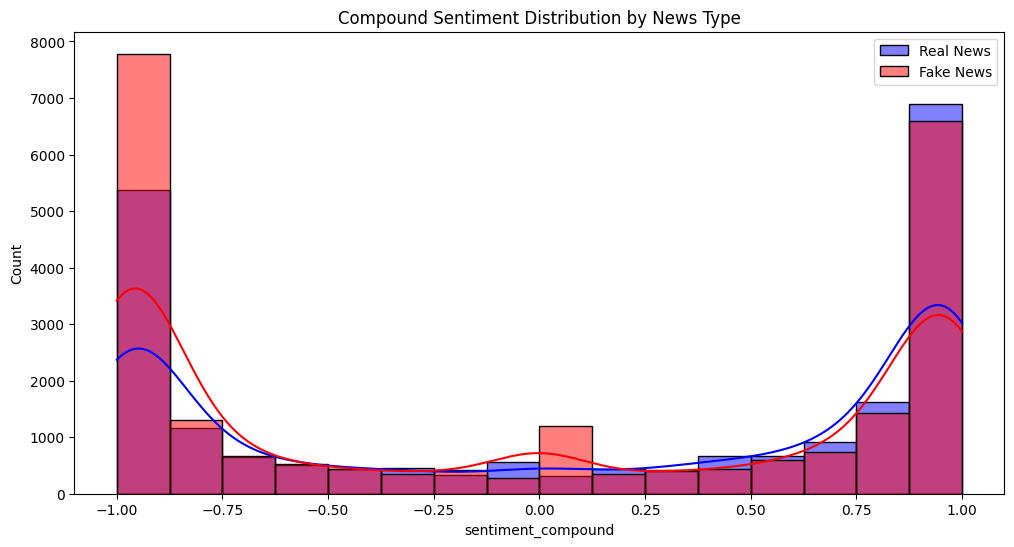

In [29]:
#  Visualize Sentiment Distributions by News Type (Fake vs Real)

# Compound Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['sentiment_compound'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['sentiment_compound'], color='red', label='Fake News', kde=True)
plt.title("Compound Sentiment Distribution by News Type")
plt.legend()
plt.show()

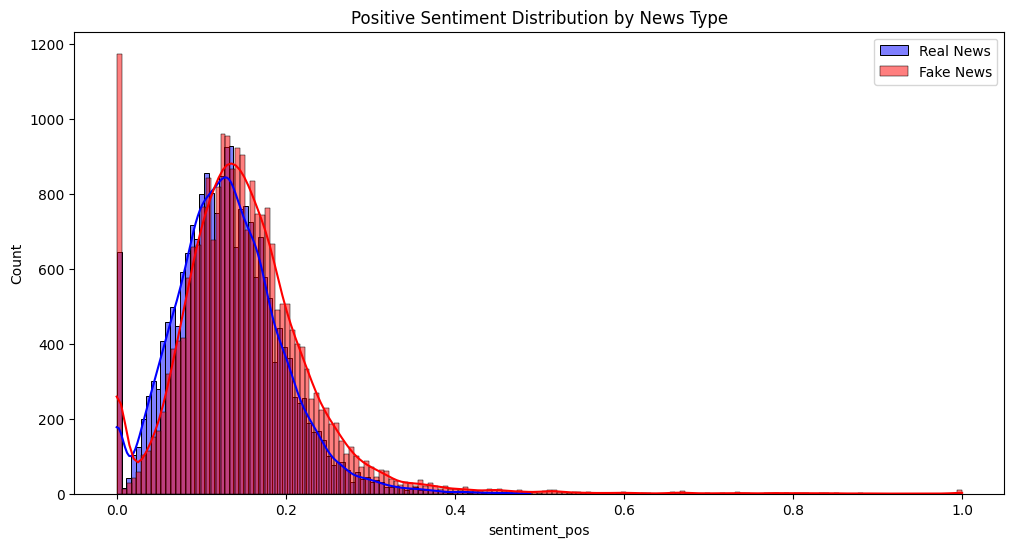

In [30]:
# Positive Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['sentiment_pos'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['sentiment_pos'], color='red', label='Fake News', kde=True)
plt.title("Positive Sentiment Distribution by News Type")
plt.legend()
plt.show()


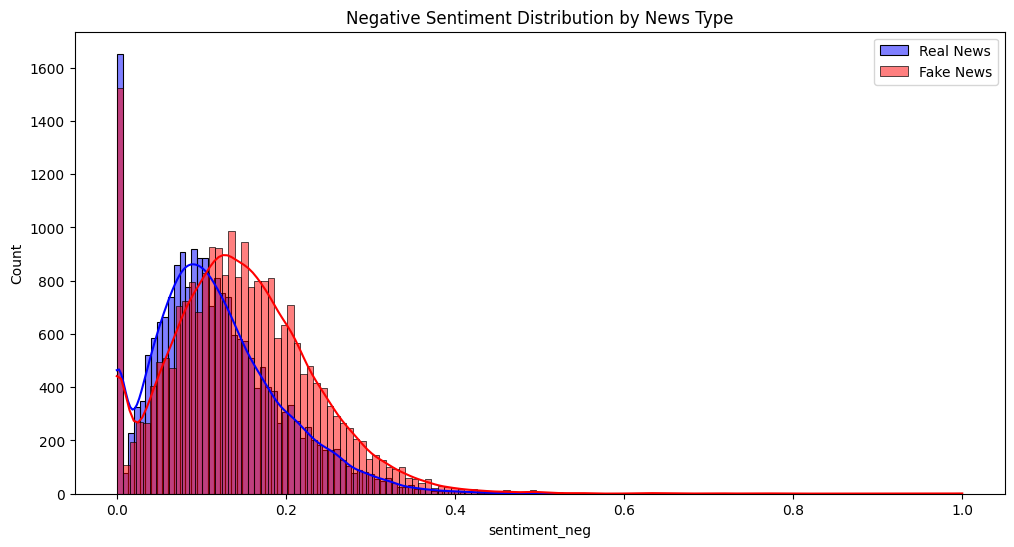

In [31]:
# Negative Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['sentiment_neg'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['sentiment_neg'], color='red', label='Fake News', kde=True)
plt.title("Negative Sentiment Distribution by News Type")
plt.legend()
plt.show()

In [ ]:
# Use TF-IDF for vectorization with n-gram
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# Feature Analysis
For feature analysis, we can investigate the most important features for each model. Here’s how you can analyze feature importance for Logistic Regression, Random Forest, and SVM with linear kernel. For Logistic Regression and SVM, feature importance can be determined by the model’s coefficients, and for Random Forest, it’s derived from feature importances based on decision trees.

# Custom Example
To check the accuracy and performance of the models i checked with  some out-of-sample-data

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample labeled test data (out-of-sample data)
sample_test_data = [
    ("Breaking: Shocking truth revealed about government secrets!", 1),  # Expected fake
    ("Scientists have confirmed that vaccines are effective against new variants.", 0),  # Expected real
    ("Experts claim that the world is flat and provide evidence to prove it.", 1),  # Expected fake
    ("The local council announced plans to improve public transportation next year.", 0),  # Expected real
    ("New research shows that drinking coffee can help you live longer.", 0),  # Expected real
    ("Aliens have been discovered living on Mars!", 1),  # Expected fake
    ("The stock market has reached an all-time high.", 0),  # Expected real
    ("Scientists have proven that the Earth is actually flat.", 1),  # Expected fake
    ("New study finds that exercise is good for mental health.", 0),  # Expected real
    ("President signs new bill to regulate social media.", 0)  # Expected real
]

# Define preprocess_text function for text cleaning
def preprocess_text(text):
    # Placeholder for text preprocessing: e.g., lowercasing, removing punctuation, etc.
    return text.lower()

# Example training data
X = [
    "Government secrets revealed!", "Vaccines are safe and effective.", "The Earth is flat!",
    "Public transportation is being improved.", "Coffee helps you live longer.",
    "Aliens are living on Mars!", "Stock market is at an all-time high.",
    "The Earth is flat!", "Exercise is good for health.", "New bill regulates social media."
]
y = [1, 0, 1, 0, 0, 1, 0, 1, 0, 0]  # Labels (1: Fake News, 0: Real News)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Function to train and test models
def train_and_test_models(X, y, sample_data, tfidf_vectorizer, preprocess_text):
    try:
        # Debug: Check if inputs are properly defined
       #print("Starting model training and testing...")

        # Check if data is empty or malformed
        if len(X) == 0 or len(y) == 0:
            print("Error: X or y is empty!")
            return

       # print("Sample Data:", sample_data[:2])  # Display first 2 samples as a check
       # print("First item in X:", X[0] if len(X) > 0 else "X is empty")
       # print("First item in y:", y[0] if len(y) > 0 else "y is empty")

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        #print("Train-test split completed.")  # Debug print

        # Fit the TF-IDF Vectorizer on the training data
        X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
        X_test_tfidf = tfidf_vectorizer.transform(X_test)
        #print("TF-IDF transformation completed.")  # Debug print
        print("Shape of X_train_tfidf:", X_train_tfidf.shape)

        # Define models
        models = {
            'Logistic Regression': LogisticRegression(max_iter=1000),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'SVM': SVC(kernel='linear', probability=True, random_state=42)
        }

        # Define StratifiedKFold with 3 splits for better handling of imbalanced classes
        stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Train and evaluate models
        for model_name, model in models.items():
            #print(f"\nTraining {model_name} model...")  # Debug print

            # Hyperparameter tuning (optional)
            params = {'C': [0.01, 0.1, 1, 10]} if model_name in ['Logistic Regression', 'SVM'] else {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
            grid_search = GridSearchCV(model, params, cv=stratified_kfold)
            grid_search.fit(X_train_tfidf, y_train)
            model = grid_search.best_estimator_

            print(f"{model_name} training completed.")

            # Evaluate on the sample test data (out-of-sample)
            print(f"\nTesting {model_name} on Sample Data:")
            correct_predictions = 0
            for i, (text, true_label) in enumerate(sample_data):
                cleaned_text = preprocess_text(text)  # Clean the text
                transformed_text = tfidf_vectorizer.transform([cleaned_text])  # Vectorize the cleaned text
                prediction = model.predict(transformed_text)[0]

                # Check if the prediction matches the true label
                is_correct = (prediction == true_label)
                correct_predictions += is_correct
                label = 'Fake News' if prediction == 1 else 'Real News'
                actual_label = 'Fake News' if true_label == 1 else 'Real News'
                #print(f"Example {i + 1} - Predicted: {label}, Actual: {actual_label}, Correct: {is_correct}")

            accuracy = correct_predictions / len(sample_data)
            print(f"{model_name} Accuracy on Sample Data: {accuracy:.2%}")

            # Test on the entire test set (out-of-sample)
            print(f"\n{model_name} Performance on Test Set:")
            test_pred = model.predict(X_test_tfidf)
            print(classification_report(y_test, test_pred, target_names=['Real News', 'Fake News']))

        print("\nOverall Performance Summary on Test Set Completed.")
    except Exception as e:
        print("An error occurred during model training and testing:", e)


# Example usage
train_and_test_models(X, y, sample_test_data, tfidf_vectorizer, preprocess_text)


Shape of X_train_tfidf: (8, 33)
Logistic Regression training completed.

Testing Logistic Regression on Sample Data:
Logistic Regression Accuracy on Sample Data: 100.00%

Logistic Regression Performance on Test Set:
              precision    recall  f1-score   support

   Real News       1.00      0.50      0.67         2
   Fake News       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

Random Forest training completed.

Testing Random Forest on Sample Data:
Random Forest Accuracy on Sample Data: 70.00%

Random Forest Performance on Test Set:
              precision    recall  f1-score   support

   Real News       0.00      0.00      0.00       2.0
   Fake News       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00   